# Elon-musk

In [10]:
# import libraries
import pandas as pd
import re #regular expression
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [4]:
# load data
data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
data

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
# Data cleaning
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
data['Text'] = data.Text.apply(clean)
data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [8]:
#Word frequency
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
Name: count, dtype: int64

In [12]:
# Stopwords
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')

# Define stopwords
stop = stopwords.words('english')

# Remove stopwords from the 'Text' column
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# word frequency after removing the top words
freq_Sw = pd.Series(' '.join(data['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
Name: count, dtype: int64

In [15]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [16]:
word_freq_df.head(20)

term  occurrences  frequency
0           aber            1   0.000075
1           able            6   0.000449
2            abo            1   0.000075
3         aboard            1   0.000075
4          abort            3   0.000224
5        absence            1   0.000075
6       absolute            1   0.000075
7     absolutely           15   0.001121
8         absorb            1   0.000075
9     absorption            1   0.000075
10        absurd            2   0.000150
11      absurdly            1   0.000075
12            ac            1   0.000075
13      academia            1   0.000075
14         accel            1   0.000075
15      accelera            1   0.000075
16    accelerate            1   0.000075
17   accelerated            1   0.000075
18  accelerating            1   0.000075
19  acceleration            1   0.000075

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [18]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [19]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

Bi-gram  Freq
0              rt spacex    71
1                  we re    26
2          spacex falcon    17
3  erdayastronaut spacex    16
4            crew dragon    13

[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

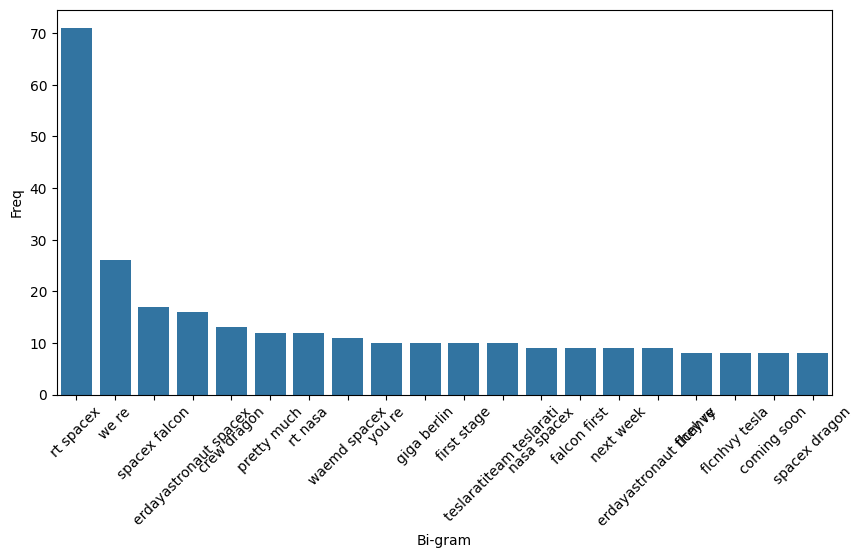

In [20]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [21]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [22]:
top3_words = get_top_n3_words(data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

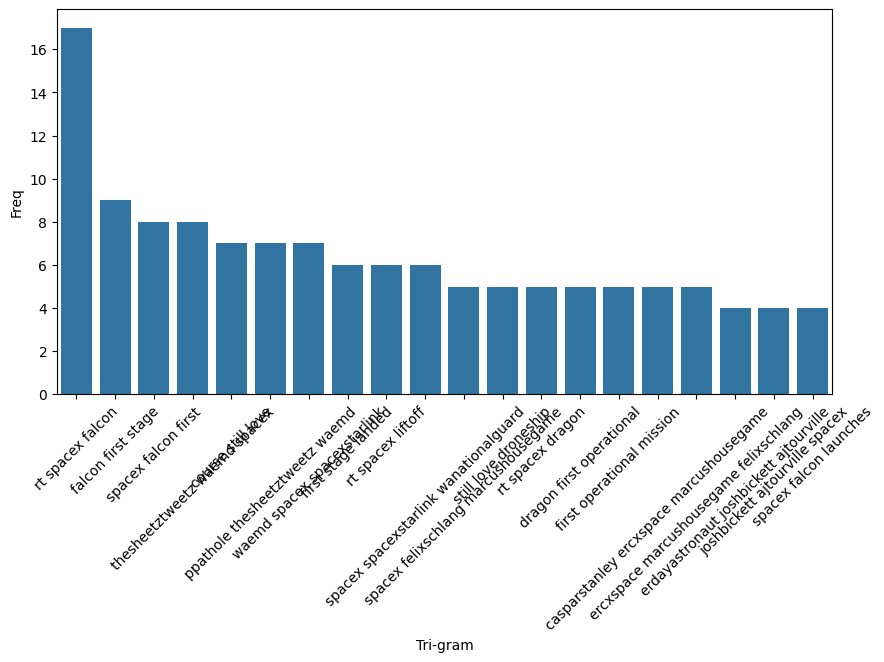

In [23]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [24]:
string_Total = " ".join(data["Text"])

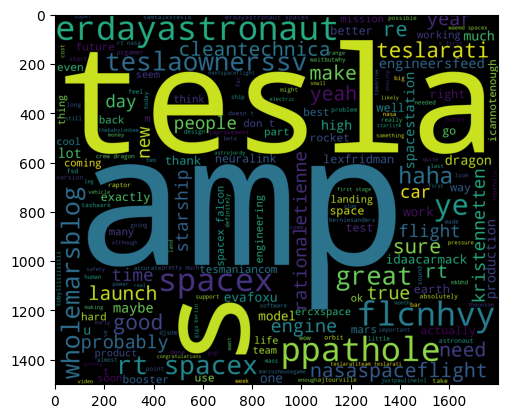

In [25]:
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Emotion Mining

In [26]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
url = 'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
reviewlist = []

In [29]:
def get_soup(url):
    r = requests.get(url)
    print(r.text)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [30]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [31]:
for x in range(1,10):
    soup = get_soup(f'https://www.amazon.in/product-reviews/B089MT34QG/ref=cm_cr_arp_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-last'}):
        pass
    else:
        break

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta http-equiv="content-type" content="text/html; charset=UTF-8">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title dir="ltr">Amazon.in</title>
<meta name="viewport" content="width=device-width">
<link rel="stylesheet" href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css">
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        ue_mid = "A21TJRUUN4KGV",
      

In [32]:
df = pd.DataFrame(reviewlist)
df.to_excel('rating.xlsx', index=False)
print('Fin.')

Fin.


In [33]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
import seaborn as sns
from textblob import TextBlob
from nltk import tokenize
from nltk.sentiment.util import *

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [37]:
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [38]:
data = pd.read_csv("reviews.csv",encoding = "ISO-8859-1")
data.head()

id              profileName  \
0   R1M3SHYTXH5XJ            Aryan Rasaily   
1   RC8V7S78LGI81            Kandarpa Bora   
2  R1549PGT9E6W4V  Mahalakshmi Subramanian   
3   RMLA9NFF8BRF6             Ankita Singh   
4  R1BS75BGGDOGN2  Narayanrajesh Prajapati   

                                                text  \
0  Received this product yesterday and seriously ...   
1                                                NaN   
2  Product is good- but green lines automatically...   
3  Despite of all three good features, it has a l...   
4  I don't like this Amazon saler fault i ordered...   

                                             date  \
0     Reviewed in India ð®ð³ on 17 March 2022   
1   Reviewed in India ð®ð³ on 17 January 2023   
2  Reviewed in India ð®ð³ on 24 February 2023   
3   Reviewed in India ð®ð³ on 12 October 2022   
4   Reviewed in India ð®ð³ on 3 November 2022   

                                               title  rating  \
0                            Most underrated phone!!       5   
1  Display problem diya hai du line Aiya hain abh...       4   
2  Green lines on mobile screen after 1.3 years- ...       3   
3                       Good phone but with glitches       4   
4  I ordered astral black but i got navey blue co...       4   

                                              images  helpful  \
0                                                NaN        6   
1  https://m.media-amazon.com/images/I/71ZIjfq65i...        5   
2  https://m.media-amazon.com/images/I/61vVTOunb0...        4   
3                                                NaN        1   
4  https://m.media-amazon.com/images/I/71FqmLEn6N...        1   

                Style name        Colour  
0  8GB RAM + 128GB Storage  Astral Black  
1                      NaN           NaN  
2  8GB RAM + 128GB Storage  Astral Black  
3  8GB RAM + 128GB Storage  Astral Black  
4                      NaN           NaN

In [39]:
data.shape

(50, 10)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50 non-null     object
 1   profileName  50 non-null     object
 2   text         48 non-null     object
 3   date         50 non-null     object
 4   title        50 non-null     object
 5   rating       50 non-null     int64 
 6   images       19 non-null     object
 7   helpful      50 non-null     int64 
 8   Style name   34 non-null     object
 9   Colour       34 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


<Axes: xlabel='rating', ylabel='Density'>

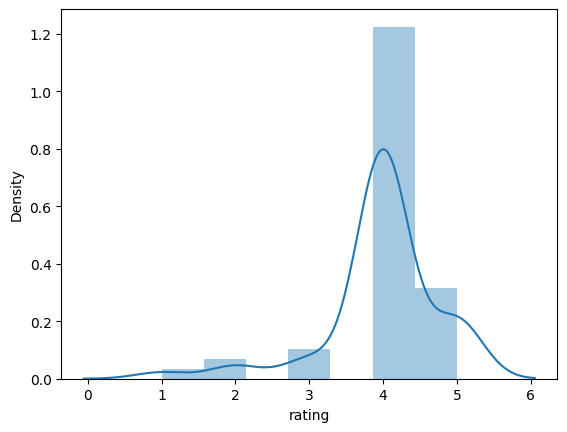

In [41]:
sns.distplot(data['rating'])

<Axes: xlabel='rating', ylabel='count'>

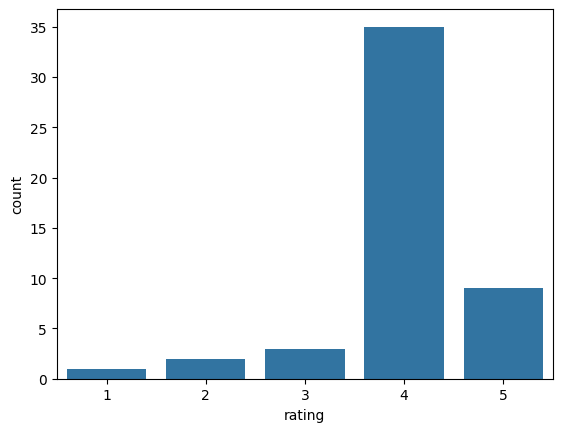

In [42]:
sns.countplot(x='rating',data=data)

In [46]:
data['rating'].value_counts()

rating
4    35
5     9
3     3
2     2
1     1
Name: count, dtype: int64

In [51]:
print(data.columns)

Index(['id', 'profileName', 'text', 'date', 'title', 'rating', 'images',
       'helpful', 'Style name', 'Colour'],
      dtype='object')


In [54]:
sid.polarity_scores(data.iloc[0]['text'])

{'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'compound': 0.9745}

In [57]:
# Replace NaN or non-string values with empty string
data['text'] = data['text'].fillna('').astype(str)

In [58]:
data['scores'] = data['text'].apply(lambda body: sid.polarity_scores(body))
data.head()

id              profileName  \
0   R1M3SHYTXH5XJ            Aryan Rasaily   
1   RC8V7S78LGI81            Kandarpa Bora   
2  R1549PGT9E6W4V  Mahalakshmi Subramanian   
3   RMLA9NFF8BRF6             Ankita Singh   
4  R1BS75BGGDOGN2  Narayanrajesh Prajapati   

                                                text  \
0  Received this product yesterday and seriously ...   
1                                                      
2  Product is good- but green lines automatically...   
3  Despite of all three good features, it has a l...   
4  I don't like this Amazon saler fault i ordered...   

                                             date  \
0     Reviewed in India ð®ð³ on 17 March 2022   
1   Reviewed in India ð®ð³ on 17 January 2023   
2  Reviewed in India ð®ð³ on 24 February 2023   
3   Reviewed in India ð®ð³ on 12 October 2022   
4   Reviewed in India ð®ð³ on 3 November 2022   

                                               title  rating  \
0                            Most underrated phone!!       5   
1  Display problem diya hai du line Aiya hain abh...       4   
2  Green lines on mobile screen after 1.3 years- ...       3   
3                       Good phone but with glitches       4   
4  I ordered astral black but i got navey blue co...       4   

                                              images  helpful  \
0                                                NaN        6   
1  https://m.media-amazon.com/images/I/71ZIjfq65i...        5   
2  https://m.media-amazon.com/images/I/61vVTOunb0...        4   
3                                                NaN        1   
4  https://m.media-amazon.com/images/I/71FqmLEn6N...        1   

                Style name        Colour  \
0  8GB RAM + 128GB Storage  Astral Black   
1                      NaN           NaN   
2  8GB RAM + 128GB Storage  Astral Black   
3  8GB RAM + 128GB Storage  Astral Black   
4                      NaN           NaN   

                                              scores  
0  {'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'co...  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...  
3  {'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compou...  
4  {'neg': 0.258, 'neu': 0.59, 'pos': 0.152, 'com...

In [63]:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['sentiment_type']=''
data.loc[data.compound>0,'sentiment_type']='POSITIVE'
data.loc[data.compound==0,'sentiment_type']='NEUTRAL'
data.loc[data.compound<0,'sentiment_type']='NEGATIVE'

In [64]:
data.head()

id              profileName  \
0   R1M3SHYTXH5XJ            Aryan Rasaily   
1   RC8V7S78LGI81            Kandarpa Bora   
2  R1549PGT9E6W4V  Mahalakshmi Subramanian   
3   RMLA9NFF8BRF6             Ankita Singh   
4  R1BS75BGGDOGN2  Narayanrajesh Prajapati   

                                                text  \
0  Received this product yesterday and seriously ...   
1                                                      
2  Product is good- but green lines automatically...   
3  Despite of all three good features, it has a l...   
4  I don't like this Amazon saler fault i ordered...   

                                             date  \
0     Reviewed in India ð®ð³ on 17 March 2022   
1   Reviewed in India ð®ð³ on 17 January 2023   
2  Reviewed in India ð®ð³ on 24 February 2023   
3   Reviewed in India ð®ð³ on 12 October 2022   
4   Reviewed in India ð®ð³ on 3 November 2022   

                                               title  rating  \
0                            Most underrated phone!!       5   
1  Display problem diya hai du line Aiya hain abh...       4   
2  Green lines on mobile screen after 1.3 years- ...       3   
3                       Good phone but with glitches       4   
4  I ordered astral black but i got navey blue co...       4   

                                              images  helpful  \
0                                                NaN        6   
1  https://m.media-amazon.com/images/I/71ZIjfq65i...        5   
2  https://m.media-amazon.com/images/I/61vVTOunb0...        4   
3                                                NaN        1   
4  https://m.media-amazon.com/images/I/71FqmLEn6N...        1   

                Style name        Colour  \
0  8GB RAM + 128GB Storage  Astral Black   
1                      NaN           NaN   
2  8GB RAM + 128GB Storage  Astral Black   
3  8GB RAM + 128GB Storage  Astral Black   
4                      NaN           NaN   

                                              scores  compound sentiment_type  
0  {'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'co...    0.9745       POSITIVE  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...    0.0000        NEUTRAL  
2  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...    0.2382       POSITIVE  
3  {'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compou...    0.2382       POSITIVE  
4  {'neg': 0.258, 'neu': 0.59, 'pos': 0.152, 'com...   -0.6921       NEGATIVE

<Axes: title={'center': 'sentiment analysis'}, xlabel='sentiment_type'>

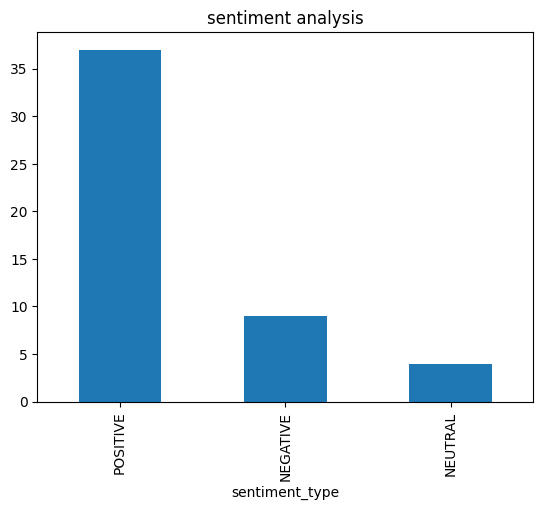

In [65]:
data.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [66]:
new_data = data.rename(columns = {"Colour": "Emotion"})
new_data.head(10)

id              profileName  \
0   R1M3SHYTXH5XJ            Aryan Rasaily   
1   RC8V7S78LGI81            Kandarpa Bora   
2  R1549PGT9E6W4V  Mahalakshmi Subramanian   
3   RMLA9NFF8BRF6             Ankita Singh   
4  R1BS75BGGDOGN2  Narayanrajesh Prajapati   
5  R337TCUE1JNHCK               sougat das   
6   RME9B2B3SMDUP                    ShiKo   
7   R28XO8JFMNVKM           Avik Mukherjee   
8  R23DLHZFCU90PG                     Neha   
9  R3KUWDZEJG55H7            Nilesh Somani   

                                                text  \
0  Received this product yesterday and seriously ...   
1                                                      
2  Product is good- but green lines automatically...   
3  Despite of all three good features, it has a l...   
4  I don't like this Amazon saler fault i ordered...   
5  Great phone. But without OIS photos shake a lo...   
6  I was using OnePlus 5 before this and it was s...   
7  Note that I bought this device at around 35k w...   
8  After using for months I am writing this revie...   
9                                           Flagship   

                                              date  \
0      Reviewed in India ð®ð³ on 17 March 2022   
1    Reviewed in India ð®ð³ on 17 January 2023   
2   Reviewed in India ð®ð³ on 24 February 2023   
3    Reviewed in India ð®ð³ on 12 October 2022   
4    Reviewed in India ð®ð³ on 3 November 2022   
5    Reviewed in India ð®ð³ on 9 November 2022   
6  Reviewed in India ð®ð³ on 30 September 2022   
7   Reviewed in India ð®ð³ on 10 February 2022   
8    Reviewed in India ð®ð³ on 12 October 2022   
9   Reviewed in India ð®ð³ on 30 November 2022   

                                               title  rating  \
0                            Most underrated phone!!       5   
1  Display problem diya hai du line Aiya hain abh...       4   
2  Green lines on mobile screen after 1.3 years- ...       3   
3                       Good phone but with glitches       4   
4  I ordered astral black but i got navey blue co...       4   
5                             Bad camera without IOS       4   
6                               Heats up real quick!       4   
7  OnePlus is still fast and smooth. Lets hope th...       5   
8                                          Greatð       4   
9                                               Nice       4   

                                              images  helpful  \
0                                                NaN        6   
1  https://m.media-amazon.com/images/I/71ZIjfq65i...        5   
2  https://m.media-amazon.com/images/I/61vVTOunb0...        4   
3                                                NaN        1   
4  https://m.media-amazon.com/images/I/71FqmLEn6N...        1   
5                                                NaN        0   
6                                                NaN        0   
7  https://m.media-amazon.com/images/I/71jtXuMNBq...        6   
8  https://m.media-amazon.com/images/I/61KttGNQRx...        1   
9                                                NaN        0   

                 Style name       Emotion  \
0   8GB RAM + 128GB Storage  Astral Black   
1                       NaN           NaN   
2   8GB RAM + 128GB Storage  Astral Black   
3   8GB RAM + 128GB Storage  Astral Black   
4                       NaN           NaN   
5  12GB RAM + 256GB Storage    Arctic Sky   
6                       NaN           NaN   
7   8GB RAM + 128GB Storage  Astral Black   
8  12GB RAM + 256GB Storage   Winter Mist   
9  12GB RAM + 256GB Storage   Winter Mist   

                                              scores  compound sentiment_type  
0  {'neg': 0.093, 'neu': 0.783, 'pos': 0.124, 'co...    0.9745       POSITIVE  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...    0.0000        NEUTRAL  
2  {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...    0.2382       POSITIVE  
3  {'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compou...    0.2

In [67]:
new_data['Emotion'].value_counts()

Emotion
Astral Black    19
Arctic Sky       8
Winter Mist      7
Name: count, dtype: int64

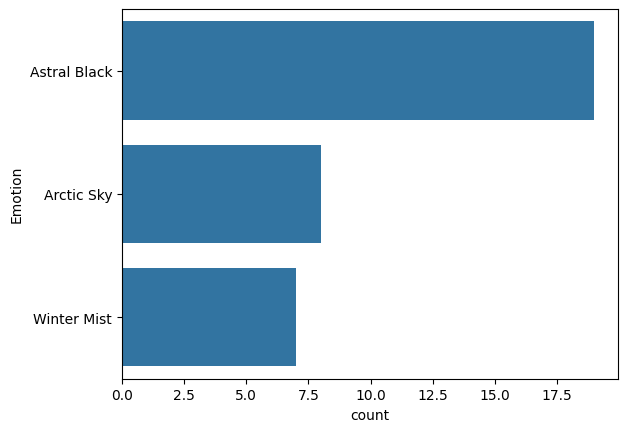

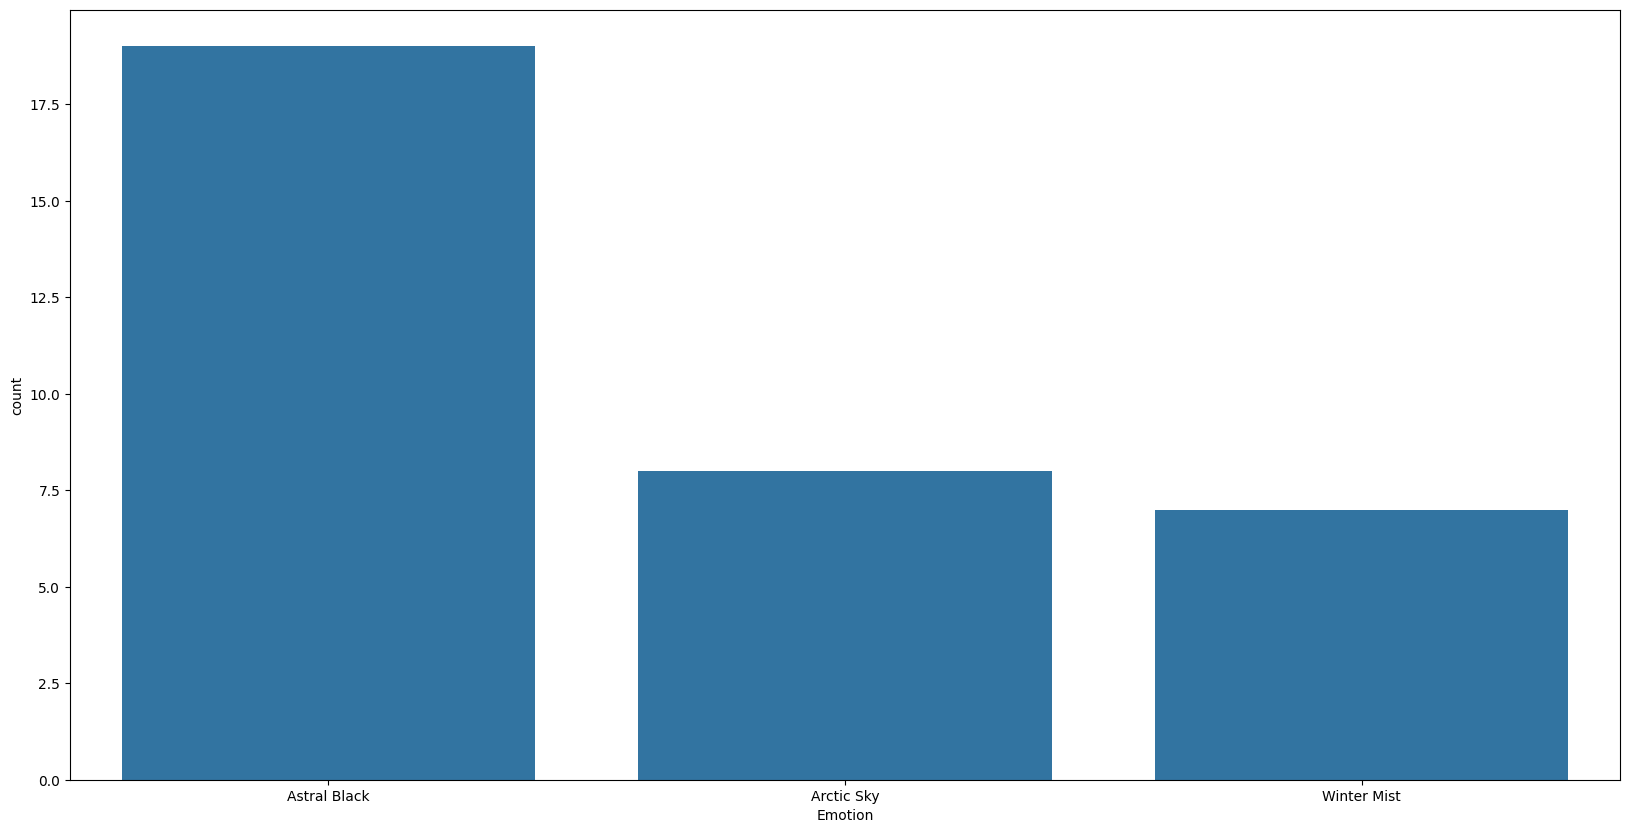

In [68]:
import matplotlib.pyplot as plt
sns.countplot(new_data['Emotion']) #old
plt.figure(figsize=(20,10)) #new
sns.countplot(x='Emotion', data=new_data)
plt.show()